<a href="https://colab.research.google.com/github/Dhafanur25/AI_DiabetesChecker/blob/main/Project_Based_Assignment_CLO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Dhafa Nur Fadillah - 1301213263
2. Fadli Dwi Ramadhan - 1301210062
3. Marcel Binggi Antonio - 1301210349

# **Latar Belakang**
Silahkan double click cell ini dan tulis latar belakang!

In [ ]:
# Import modul yang dibutuhkan
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt # Modul untuk membuat diagram batang
import seaborn as sns # Modul untuk membuat pairplot

## **Read Data**

In [ ]:
# Setting url dengan link dataset
url = "https://archive.ics.uci.edu/static/public/891/data.csv"

# Baca dataset
df = pd.read_csv(url)

In [ ]:
# Output data frame
df

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,1,40,1,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,1,0,0,0,0,25,1,0,0,1,...,0,1,3,0,0,0,0,7,6,1
2,2,0,1,1,1,28,0,0,0,0,...,1,1,5,30,30,1,0,9,4,8
3,3,0,1,0,1,27,0,0,0,1,...,1,0,2,0,0,0,0,11,3,6
4,4,0,1,1,1,24,0,0,0,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,253675,0,1,1,1,45,0,0,0,0,...,1,0,3,0,5,0,1,5,6,7
253676,253676,1,1,1,1,18,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,253677,0,0,0,1,28,0,0,0,1,...,1,0,1,0,0,0,0,2,5,2
253678,253678,0,1,0,1,23,0,0,0,0,...,1,0,3,0,0,0,1,7,5,1


## **Data PreProcessing**

### **Drop Unnecessary Features**




In [ ]:
# Column 'ID' di drop karena sudah indexing sendiri
df.drop('ID', axis=1, inplace=True)

# Column 'AnyHealthcare' di drop karena tidak berpengaruh pada diabetes
df.drop('AnyHealthcare', axis=1, inplace=True)

# Column 'NoDocbcCost' di drop karena tidak berpengaruh pada diabetes
df.drop('NoDocbcCost', axis=1, inplace=True)

# Column 'MentHlth' di drop karena tidak berpengaruh pada diabetes
df.drop('MentHlth', axis=1, inplace=True)

# Column 'Education' di drop karena tidak berpengaruh pada diabetes
df.drop('Education', axis=1, inplace=True)

# Column 'Income' di drop karena tidak berpengaruh pada diabetes
df.drop('Income', axis=1, inplace=True)

### **Handle Missing Values**

In [ ]:
# Function untuk check missing values
def check_missing_values(df):
    missing_values = {}
    total_rows = len(df)

    for column in df.columns:
        missing_count = df[column].isna().sum()
        if missing_count > 0:
            missing_values[column] = missing_count

    # Jika tidak ada missing values pada data frame akan keluar dari function
    if len(missing_values) == 0:
        print(f'Tidak ada missing values pada Data Frame ini')
        return

    # Hitung dan print persentase missing value(s) setiap kolom
    for column, count in missing_values.items():
        percentage = (count / total_rows) * 100
        print(f"Column '{column}': {count} missing value(s) ({percentage:.2f}%)")

    # Buat bar chart
    if len(missing_values) > 0:

        # Buat list columns, count missing value(s), dan persen
        columns = list(missing_values.keys())
        counts = list(missing_values.values())
        percentages = [(count / total_rows) * 100 for count in counts]

        # Plot missing value(s) menggunakan bar chart
        fig, ax = plt.subplots()
        ax.bar(columns, counts)

        # Tambah label persen
        for i, count in enumerate(counts):
            ax.text(i, count, f"{percentages[i]:.2f}%", ha='center', va='bottom')

        # Set labels dan title
        ax.set_xlabel('Columns')
        ax.set_ylabel('Missing Value Count')
        ax.set_title('Missing Values')
        ax.set_xticklabels(columns, rotation=90)

        plt.tight_layout()
        plt.show()

# Panggil function
check_missing_values(df)

Tidak ada missing values pada Data Frame ini


### **Handle Duplicate Data**

In [ ]:
# Function untuk handle data duplikat
def handle_duplicates(df):
    # Periksa data duplikat
    duplicates = df[df.duplicated()]

    # Jika ada data duplikat, cetak data tersebut dan hapus duplikat dari DataFrame
    if not duplicates.empty:
        print("Data duplikat yang ditemukan:")
        print(duplicates)
        df.drop_duplicates(inplace=True)  # Drop semua rows yang mengandung duplikat
        print("Data duplikat telah dihapus.")
    else:
        print("Tidak ada Duplicate values pada Data Frame ini")

# Panggil function
handle_duplicates(df)

Data duplikat yang ditemukan:
        Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
1035                  0       1         0          1   40       0       0   
1129                  0       0         0          1   25       0       0   
1205                  0       0         0          1   20       0       0   
1242                  1       1         1          1   27       1       0   
1369                  0       1         0          1   30       1       0   
...                 ...     ...       ...        ...  ...     ...     ...   
253657                0       0         1          1   24       0       0   
253667                0       1         1          1   28       1       0   
253672                0       1         0          1   30       1       0   
253674                0       0         0          1   27       0       0   
253677                0       0         0          1   28       0       0   

        HeartDiseaseorAttack  PhysActivity  F

### **Split df menjadi 3 secara random**

In [ ]:
# Simpan df_original
df_ori = df

# Split df untuk 3 model
df_1 = df.sample(n=6000, random_state=42)  # Sample 6000 rows
df_2 = df.sample(n=8000, random_state=42)  # Sample 8000 rows
df_3 = df.sample(n=10000, random_state=42)  # Sample 10000 rows

## **Explorasi Data**

In [ ]:
# Output df
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,PhysHlth,DiffWalk,Sex,Age
0,0,1,1,1,40,1,0,0,0,0,1,0,5,15,1,0,9
1,0,0,0,0,25,1,0,0,1,0,0,0,3,0,0,0,7
2,0,1,1,1,28,0,0,0,0,1,0,0,5,30,1,0,9
3,0,1,0,1,27,0,0,0,1,1,1,0,2,0,0,0,11
4,0,1,1,1,24,0,0,0,1,1,1,0,2,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253673,0,1,0,1,42,0,0,0,1,1,1,0,3,4,0,1,3
253675,0,1,1,1,45,0,0,0,0,1,1,0,3,5,0,1,5
253676,1,1,1,1,18,0,0,0,0,0,0,0,4,0,1,0,11
253678,0,1,0,1,23,0,0,0,0,1,1,0,3,0,0,1,7


In [ ]:
# Print jumlah baris dan kolom df
df.shape

(167550, 17)

In [ ]:
# Print tipedata setiap fitur pada df
df.dtypes

Diabetes_binary         int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
GenHlth                 int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
dtype: object

In [ ]:
# Print statistik pada df
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,PhysHlth,DiffWalk,Sex,Age
count,167550.000000,167550.000000,167550.000000,167550.000000,167550.000000,167550.000000,167550.000000,167550.000000,167550.000000,167550.000000,167550.000000,167550.000000,167550.000000,167550.000000,167550.000000,167550.000000,167550.000000
mean,0.194682,0.506983,0.479899,0.950916,29.432551,0.496819,0.060639,0.133566,0.671531,0.573584,0.753059,0.074551,2.798520,6.201981,0.246100,0.448523,8.243169
std,0.395957,0.499953,0.499597,0.216044,7.380580,0.499991,0.238667,0.340187,0.469658,0.494557,0.431234,0.262666,1.090015,9.973705,0.430739,0.497345,3.070296
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,6.000000
50%,0.000000,1.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,9.000000
75%,0.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,7.000000,0.000000,1.000000,11.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,1.000000,1.000000,13.000000


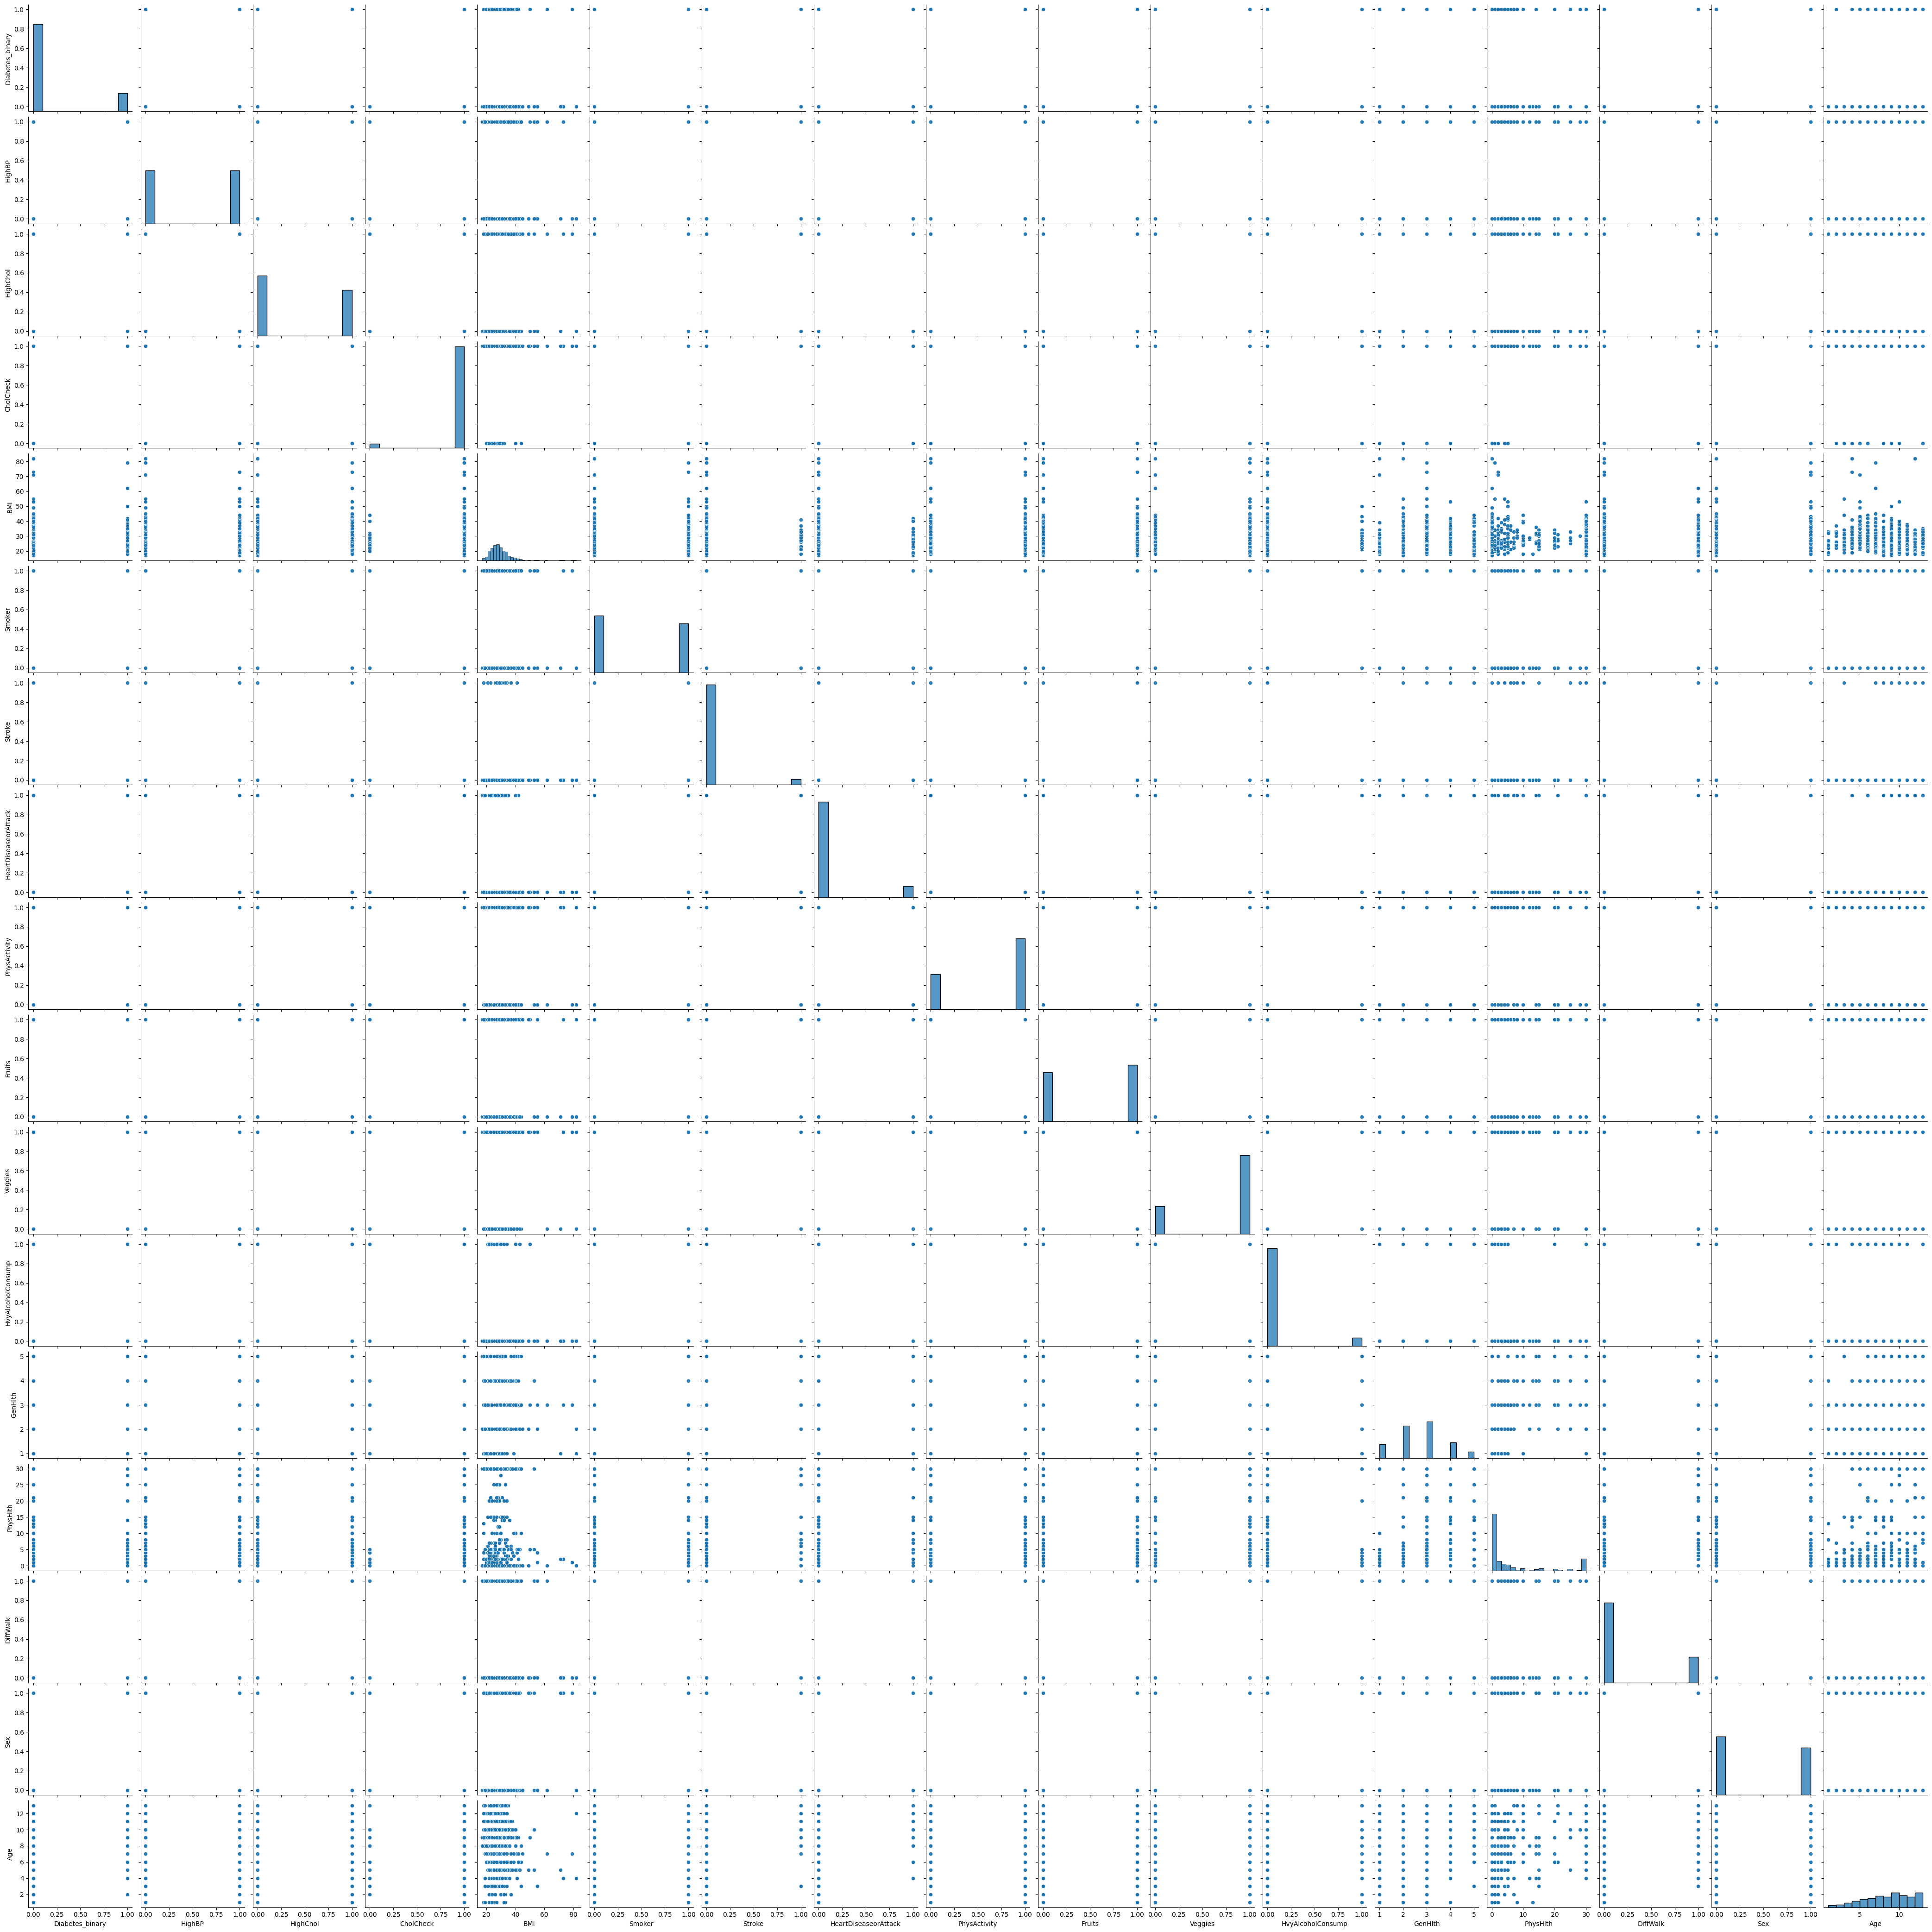

In [ ]:
# Buat pairplot dengan df sampel 500 rows
sns.pairplot(df.sample(n=500, random_state=42))

# Tampilkan pairplot
plt.show()

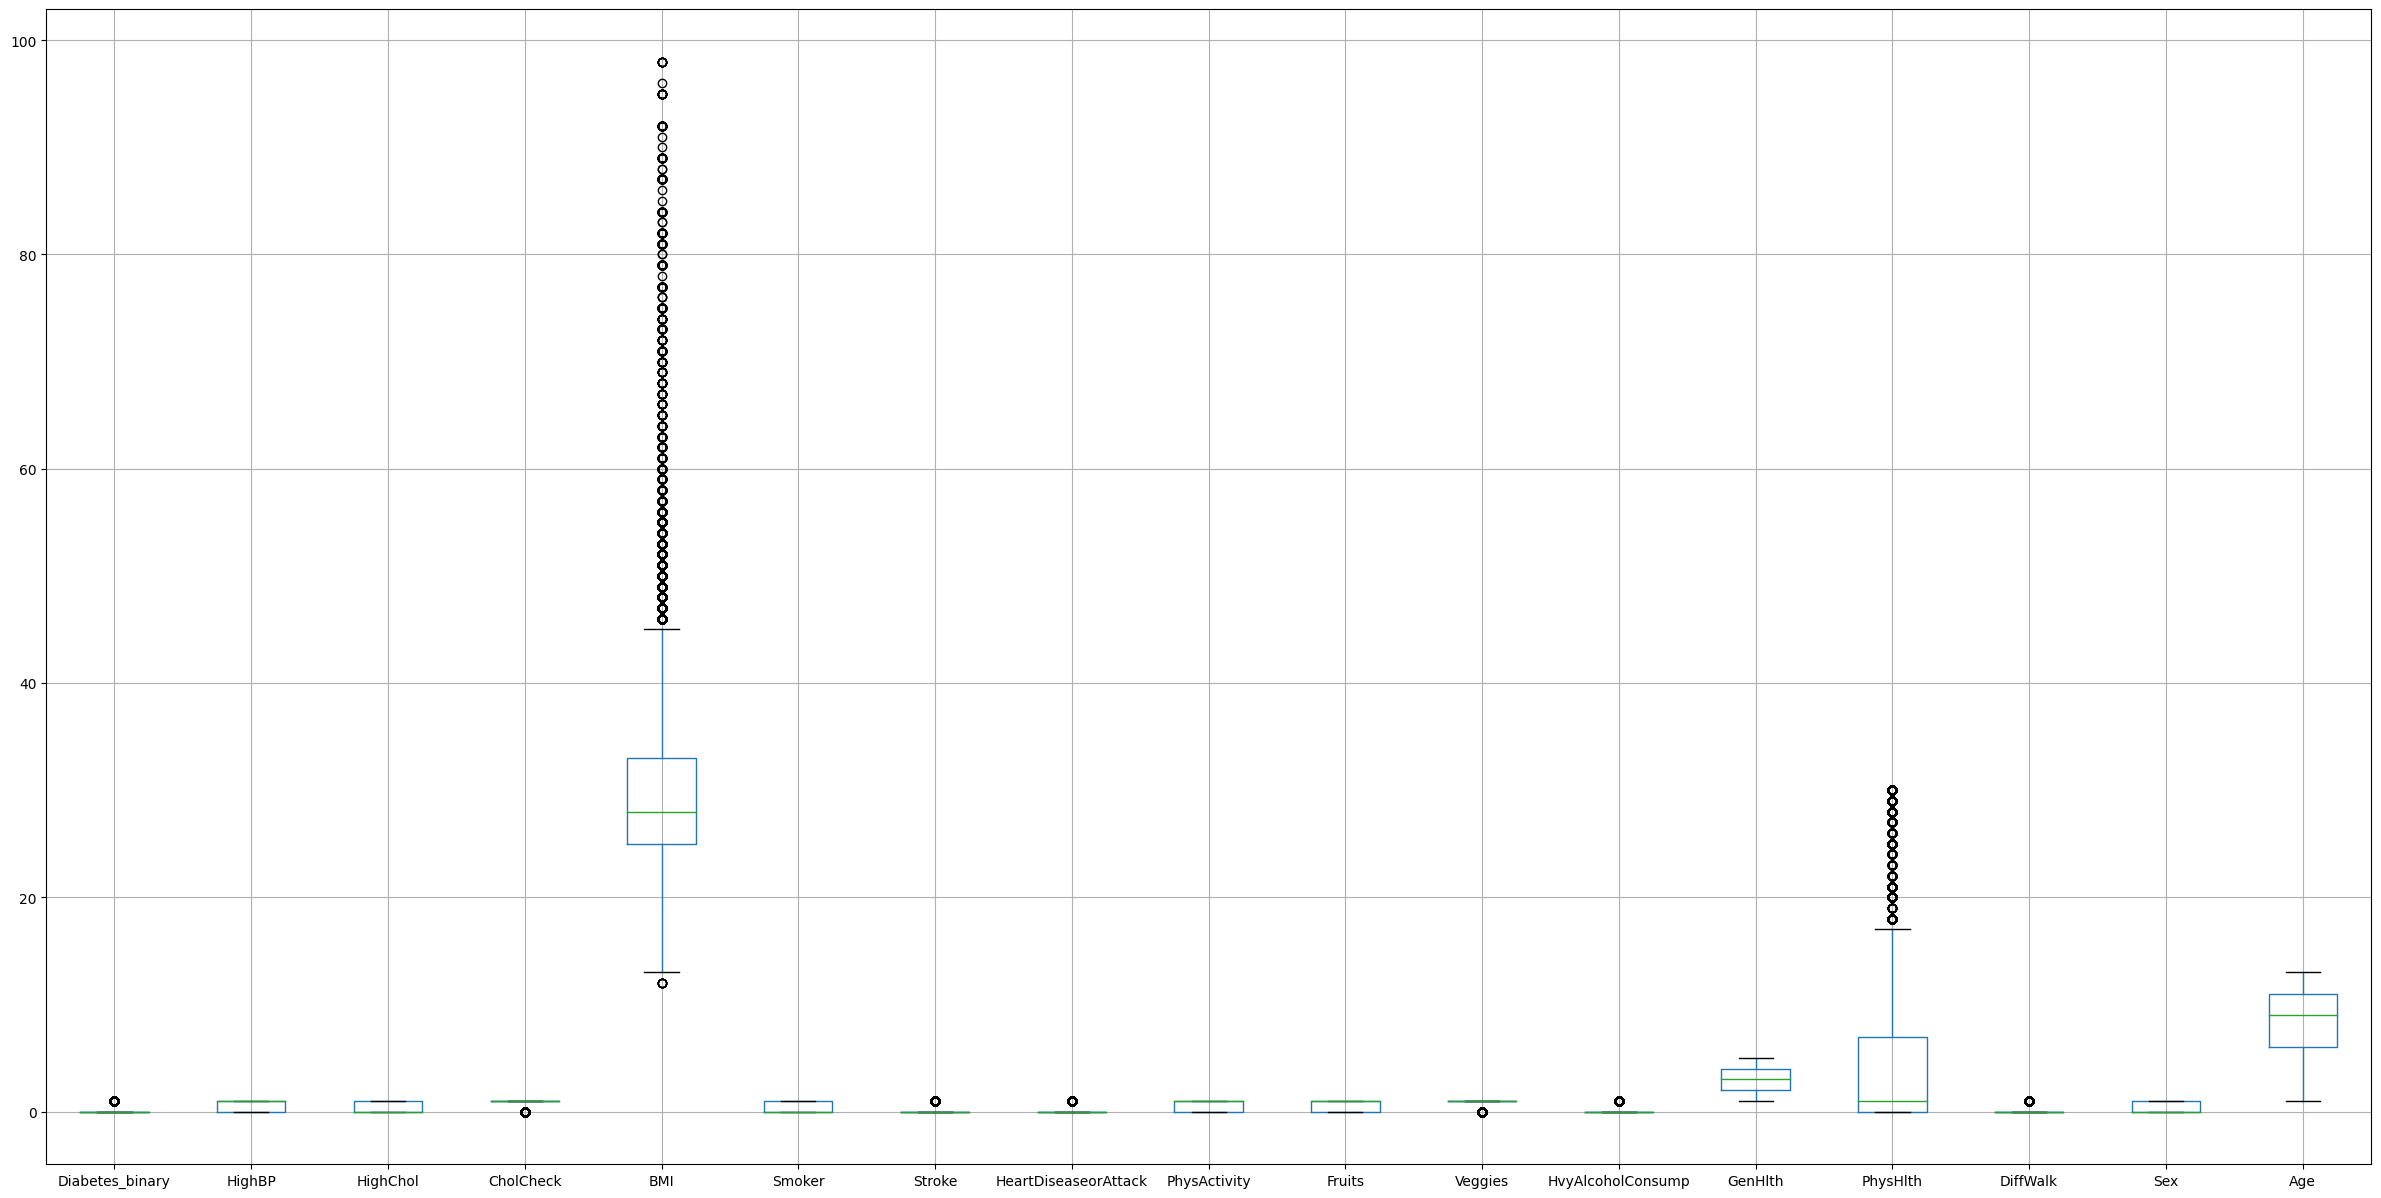

In [ ]:
# Buat boxplot
df.boxplot()

# Setting boxplot
fig = plt.gcf()
fig.set_size_inches(30, 15)

# Tampilkan boxplot
plt.show()

# **Ringkasan Metode**
Silahkan double click cell ini dan tulis ringkasan metode!

In [ ]:
# Inisialisasi variabel untuk menyimpan hasil
results = []

## **class untuk train, prediksi, dan akurasi**

In [ ]:
class ANNClassifier:
    # Constructor
    def __init__(self, input_size, hidden_size, output_size, num_epochs, learning_rate=0.001):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, X_train, y_train):

        # Inisialisasi weights dan biases secara random untuk neural network
        np.random.seed(42)
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

        # Train neural network data training menggunakan backpropagation
        for epoch in range(self.num_epochs):
            for t in range(X_train.shape[0]):
                x_t = X_train[t]
                y_t = y_train[t]

                # Forward pass
                a1 = np.dot(x_t, self.W1) + self.b1
                h1 = self.sigmoid(a1)
                a2 = np.dot(h1, self.W2) + self.b2
                y_pred = self.sigmoid(a2)

                # Compute loss (Binary Cross Entropy)
                loss = -y_t * np.log(y_pred) - (1 - y_t) * np.log(1 - y_pred)

                # Backpropagation
                delta_y = y_pred - y_t
                delta_h1 = np.dot(delta_y, self.W2.T) * h1 * (1 - h1)

                # Update weights dan biases
                dW1 = np.outer(x_t, delta_h1)
                db1 = delta_h1
                dW2 = np.outer(h1, delta_y)
                db2 = delta_y

                self.W1 -= self.learning_rate * dW1
                self.b1 -= self.learning_rate * db1
                self.W2 -= self.learning_rate * dW2
                self.b2 -= self.learning_rate * db2

    def evaluate(self, X_test, y_test, threshold=0.5):

        # Inisialisasi variabel untuk menyimpan prediksi-prediksi
        predictions = []

        # Buat prediksi-prediksi dari test data
        for t in range(X_test.shape[0]):
            x_t = X_test[t]
            a1 = np.dot(x_t, self.W1) + self.b1
            h1 = self.sigmoid(a1)
            a2 = np.dot(h1, self.W2) + self.b2
            y_pred = self.sigmoid(a2)
            predictions.append(y_pred)

        # Kalkulasi akurasi
        y_test_binary = (y_test >= threshold).astype(int)

        predictions = np.array(predictions)
        predictions = (predictions >= threshold).astype(int)
        predictions = [item for sublist in predictions for subsublist in sublist for item in subsublist]

        correct_predictions = 0
        total_predictions = len(y_test_binary)

        for true_label, predicted_label in zip(y_test_binary, predictions):
            if true_label == predicted_label:
                correct_predictions += 1

        # Kalkulasi akurasi dengan membandingkan label prediksi dan label sebenarnya
        accuracy = (correct_predictions / total_predictions)*100

        return accuracy

## **Baseline Model (6000 rows)**

In [ ]:
# Baseline Model
# Set df sebagai df_1
df = df_1

# Reset index untuk df
df.reset_index(drop=True, inplace=True)

# Split data menjadi fitur (X) and target (y)
X = df.drop('Diabetes_binary', axis=1).values
y = df['Diabetes_binary'].values

# Standarisasi fitur
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

# Split data menjadi train dan test
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape data untuk input ANN
X_train = X_train[:, np.newaxis, :]
X_test = X_test[:, np.newaxis, :]

# Panggil class ANNCLassifier
classifier = ANNClassifier(input_size=X_train.shape[2], hidden_size=64, output_size=1, num_epochs=50)

# Panggil method untuk train
classifier.train(X_train, y_train)

# Panggil method untuk evaluasi
accuracy = classifier.evaluate(X_test[:, np.newaxis, :], y_test)

# masukkan hasil ke result
results.append(accuracy)

# Tampilkan akurasi
print("Dengan epochs = 50, sample df = 6000 row")
print(f"Accuracy Model 1: {accuracy}%")

Dengan epochs = 50, sample df = 6000 row
Accuracy Model 1: 80.41666666666667%


## **Model 2 (8000 rows)**

In [ ]:
#Model 2
# Set df sebagai df_2
df = df_2

# Reset index untuk df
df.reset_index(drop=True, inplace=True)

# Split data menjadi fitur (X) and target (y)
X = df.drop('Diabetes_binary', axis=1).values
y = df['Diabetes_binary'].values

# Standarisasi fitur
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

# Split data menjadi train dan test
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape data untuk input ANN
X_train = X_train[:, np.newaxis, :]
X_test = X_test[:, np.newaxis, :]

# Panggil class ANNCLassifier
classifier = ANNClassifier(input_size=X_train.shape[2], hidden_size=64, output_size=1,num_epochs=100)

# Panggil method untuk train
classifier.train(X_train, y_train)

# Panggil method untuk evaluasi
accuracy = classifier.evaluate(X_test[:, np.newaxis, :], y_test)

# masukkan hasil ke result
results.append(accuracy)

# Tampilkan akurasi
print("Dengan epochs = 100, sample df = 8000 row")
print(f"Accuracy Model 2: {accuracy}%")

Dengan epochs = 100, sample df = 8000 row
Accuracy Model 2: 80.8125%


## **Model 3 (10000 rows)**

In [ ]:
# Model 3
# Set df sebagai df_3
df = df_3

# Reset index untuk df
df.reset_index(drop=True, inplace=True)

# Split data menjadi fitur (X) and target (y)
X = df.drop('Diabetes_binary', axis=1).values
y = df['Diabetes_binary'].values

# Standarisasi fitur
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

# Split data menjadi train dan test
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape data untuk input ANN
X_train = X_train[:, np.newaxis, :]
X_test = X_test[:, np.newaxis, :]

# Panggil class ANNCLassifier
classifier = ANNClassifier(input_size=X_train.shape[2], hidden_size=64, output_size=1,num_epochs=200)

# Panggil method untuk train
classifier.train(X_train, y_train)

# Panggil method untuk evaluasi
accuracy = classifier.evaluate(X_test[:, np.newaxis, :], y_test)

# masukkan hasil ke result
results.append(accuracy)

# Tampilkan akurasi
print("Dengan epochs = 200, sample df = 10000 row")
print(f"Accuracy Model 3: {accuracy}%")

Dengan epochs = 200, sample df = 10000 row
Accuracy Model 3: 79.65%


# **Hasil**

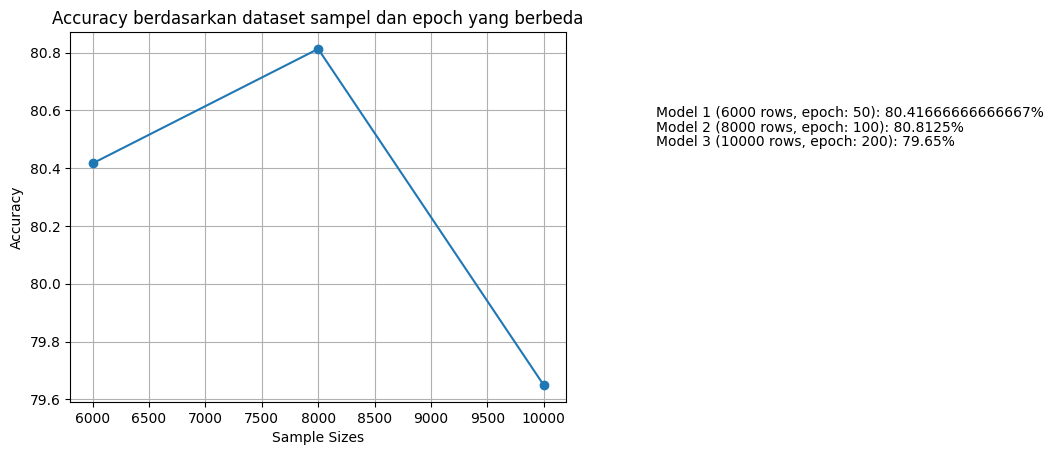

In [ ]:
# Sample size yang digunakan
sample_sizes = [6000, 8000, 10000]
epoch = [50, 100, 200]

# Membuat line plot
plt.plot(sample_sizes, results, marker='o', linestyle='-')

# Menambah labels dan title
plt.xlabel('Sample Sizes')
plt.ylabel('Accuracy')
plt.title('Accuracy berdasarkan dataset sampel dan epoch yang berbeda')

# Menambah grid
plt.grid(True)

# Menambah text setiap akurasi di sebelah plot
for i, txt in enumerate(results):
    plt.text(11000, results[0]+((len(results)-i)/20), f"Model {i+1} ({sample_sizes[i]} rows, epoch: {epoch[i]}): {results[i]}%",
             verticalalignment='bottom', horizontalalignment='left')

# Tampilkan hasil plot
plt.show()